# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

In [3]:
cities

['tuktoyaktuk',
 'lyman',
 'stranda',
 'punta arenas',
 'aklavik',
 'rikitea',
 'ushuaia',
 'palmer',
 'mataura',
 'longlac',
 'taolanaro',
 'portland',
 'vaini',
 'blackwater',
 'saskylakh',
 'provideniya',
 'bambous virieux',
 'acapulco',
 'busselton',
 'ribeira grande',
 'beringovskiy',
 'tiksi',
 'bermejo',
 'hilo',
 'hobart',
 'cayenne',
 'fortuna',
 'prince rupert',
 'fallon',
 'hwange',
 'butaritari',
 'tecoanapa',
 'chimoio',
 'yulara',
 'humberto de campos',
 'pacific grove',
 'faanui',
 'jamestown',
 'praia da vitoria',
 'nanortalik',
 'grindavik',
 'atuona',
 'kruisfontein',
 'narsaq',
 'east london',
 'port alfred',
 'dikson',
 'enterprise',
 'airai',
 'taldan',
 'jadu',
 'tevriz',
 'ancud',
 'antalaha',
 'luang prabang',
 'lavrentiya',
 'mandalgovi',
 'menongue',
 'arlit',
 'tumannyy',
 'vila franca do campo',
 'semnan',
 'dalvik',
 'attawapiskat',
 'albany',
 'saint-philippe',
 'mahebourg',
 'vaitupu',
 'port elizabeth',
 'laiyang',
 'sambava',
 'kirovskiy',
 'mitsamiouli

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : tuktoyaktuk
Processing Record 2 of Set 1 : lyman
Processing Record 3 of Set 1 : stranda
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : aklavik
Processing Record 6 of Set 1 : rikitea
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : palmer
Processing Record 9 of Set 1 : mataura
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 1 : portland
Processing Record 11 of Set 1 : vaini
Processing Record 12 of Set 1 : blackwater
Processing Record 13 of Set 1 : saskylakh
Processing Record 14 of Set 1 : provideniya
Processing Record 15 of Set 1 : bambous virieux
Processing Record 16 of Set 1 : acapulco
Processing Record 17 of Set 1 : busselton
Processing Record 18 of Set 1 : ribeira grande
Processing Record 19 of Set 1 : beringovskiy
Processing Record 20 of Set 1 : tiksi
Processing Record 21 of Set 1 : bermejo
Processing Record 22

Processing Record 33 of Set 4 : olinda
Processing Record 34 of Set 4 : salinopolis
Processing Record 35 of Set 4 : la ronge
Processing Record 36 of Set 4 : abu dhabi
Processing Record 37 of Set 4 : taywarah
City not found. Skipping...
Processing Record 38 of Set 4 : marsh harbour
Processing Record 39 of Set 4 : lorengau
Processing Record 40 of Set 4 : outlook
Processing Record 41 of Set 4 : kita
Processing Record 42 of Set 4 : ixtepec
Processing Record 43 of Set 4 : laukaa
Processing Record 44 of Set 4 : eidfjord
Processing Record 45 of Set 4 : komsomolskiy
Processing Record 46 of Set 4 : fukue
Processing Record 47 of Set 4 : khatanga
Processing Record 48 of Set 4 : estelle
Processing Record 49 of Set 4 : kodiak
Processing Record 50 of Set 4 : nauta
Processing Record 0 of Set 5 : phalombe
Processing Record 1 of Set 5 : moramanga
Processing Record 2 of Set 5 : atherton
Processing Record 3 of Set 5 : linhares
Processing Record 4 of Set 5 : clyde river
Processing Record 5 of Set 5 : tshan

Processing Record 14 of Set 8 : gornoye loo
Processing Record 15 of Set 8 : eldorado
Processing Record 16 of Set 8 : bahir dar
Processing Record 17 of Set 8 : peniche
Processing Record 18 of Set 8 : xifeng
Processing Record 19 of Set 8 : adana
City not found. Skipping...
Processing Record 20 of Set 8 : moindou
City not found. Skipping...
Processing Record 21 of Set 8 : bonthe
Processing Record 22 of Set 8 : kudahuvadhoo
Processing Record 23 of Set 8 : bambari
Processing Record 24 of Set 8 : tanggu
Processing Record 25 of Set 8 : coquimbo
City not found. Skipping...
Processing Record 26 of Set 8 : suluq
City not found. Skipping...
Processing Record 27 of Set 8 : markova
Processing Record 28 of Set 8 : terrace bay
Processing Record 29 of Set 8 : lelydorp
Processing Record 30 of Set 8 : north bend
Processing Record 31 of Set 8 : serebryansk
Processing Record 32 of Set 8 : college
Processing Record 33 of Set 8 : aksu
Processing Record 34 of Set 8 : saldanha
Processing Record 35 of Set 8 : 

Processing Record 48 of Set 11 : daniel flores
Processing Record 49 of Set 11 : samsun
Processing Record 50 of Set 11 : aviles
Processing Record 0 of Set 12 : adrar
Processing Record 1 of Set 12 : domoni
Processing Record 2 of Set 12 : winnemucca
Processing Record 3 of Set 12 : oranjestad
Processing Record 4 of Set 12 : brookings
Processing Record 5 of Set 12 : pangoa
Processing Record 6 of Set 12 : betlitsa
Processing Record 7 of Set 12 : krasnaya gora
Processing Record 8 of Set 12 : aragarcas
Processing Record 9 of Set 12 : vanimo
Processing Record 10 of Set 12 : mitu
Processing Record 11 of Set 12 : konstantinovka
Processing Record 12 of Set 12 : deputatskiy
Processing Record 13 of Set 12 : tongliao
Processing Record 14 of Set 12 : san francisco
Processing Record 15 of Set 12 : los llanos de aridane
Processing Record 16 of Set 12 : tete
Processing Record 17 of Set 12 : green river
Processing Record 18 of Set 12 : sept-iles
Processing Record 19 of Set 12 : vrede
Processing Record 20 

In [6]:
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Clouds        584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [8]:
#Display dataframe
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,53.15,56,57,12.46,CA,1627077620
1,Lyman,48.9884,37.8023,61.88,59,0,3.94,UA,1627077621
2,Stranda,62.3096,6.9358,60.35,91,97,2.01,NO,1627077622
3,Punta Arenas,-53.1500,-70.9167,37.11,86,57,18.03,CL,1627077622
4,Aklavik,68.2191,-135.0107,63.43,72,75,4.61,CA,1627077544


In [9]:
#Display the DataFrame by DataFrame.describe
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,18.152300,16.717948,69.686627,70.657534,50.464041,7.847466,1.627078e+09
std,32.883900,88.108717,14.503532,21.497038,39.319583,5.959794,1.049600e+02
min,-54.800000,-175.200000,31.150000,8.000000,0.000000,0.000000,1.627077e+09
25%,-10.494975,-59.673975,59.245000,62.000000,7.000000,3.620000,1.627078e+09
50%,22.281200,22.881900,71.395000,76.000000,52.500000,6.170000,1.627078e+09
75%,44.329425,92.093925,79.725000,86.000000,92.250000,10.550000,1.627078e+09
max,77.484000,179.316700,107.200000,100.000000,100.000000,34.200000,1.627078e+09


In [10]:
#Save weather data to a cities csv file
weather_data.to_csv("output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
Humidity_over_Hun=weather_data.loc[weather_data["Humidity"]>100 , :]
Humidity_over_Hun["Humidity"]

Series([], Name: Humidity, dtype: int64)

In [12]:
#There is not city where humidity over 100%.
#Thus we don't have outliter data, we can skip this step and start to bulit chart
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,53.15,56,57,12.46,CA,1627077620
1,Lyman,48.9884,37.8023,61.88,59,0,3.94,UA,1627077621
2,Stranda,62.3096,6.9358,60.35,91,97,2.01,NO,1627077622
3,Punta Arenas,-53.1500,-70.9167,37.11,86,57,18.03,CL,1627077622
4,Aklavik,68.2191,-135.0107,63.43,72,75,4.61,CA,1627077544


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data.drop(Humidity_over_Hun["Humidity"],inplace=False )

In [14]:
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,53.15,56,57,12.46,CA,1627077620
1,Lyman,48.9884,37.8023,61.88,59,0,3.94,UA,1627077621
2,Stranda,62.3096,6.9358,60.35,91,97,2.01,NO,1627077622
3,Punta Arenas,-53.1500,-70.9167,37.11,86,57,18.03,CL,1627077622
4,Aklavik,68.2191,-135.0107,63.43,72,75,4.61,CA,1627077544


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

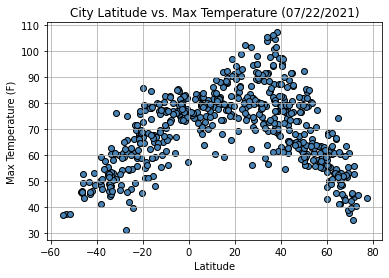

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (07/22/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

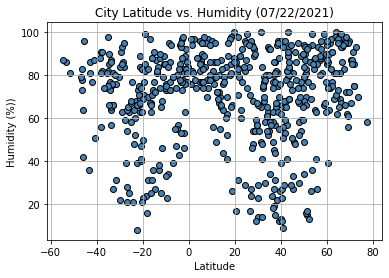

In [16]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (07/22/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

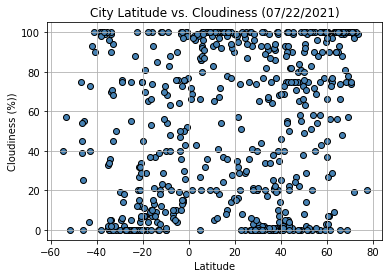

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (07/22/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

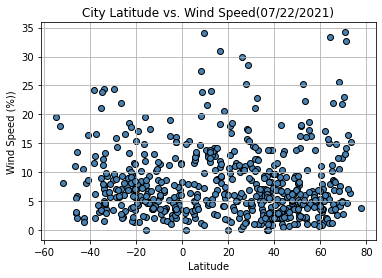

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed(07/22/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [19]:
#Create new DataFrame only inculding Northern Hemisphere
Northern_Hemisphere_df=weather_data.loc[weather_data["Lat"]>0]
Northern_Hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,53.15,56,57,12.46,CA,1627077620
1,Lyman,48.9884,37.8023,61.88,59,0,3.94,UA,1627077621
2,Stranda,62.3096,6.9358,60.35,91,97,2.01,NO,1627077622
4,Aklavik,68.2191,-135.0107,63.43,72,75,4.61,CA,1627077544
7,Palmer,42.1584,-72.3287,77.63,68,75,2.98,US,1627077624


In [20]:
#Create new DataFrame only inculding Southern Hemisphere
Southern_Hemisphere_df=weather_data.loc[weather_data["Lat"]<0]
Southern_Hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
3,Punta Arenas,-53.1500,-70.9167,37.11,86,57,18.03,CL,1627077622
5,Rikitea,-23.1203,-134.9692,71.35,60,88,13.35,PF,1627077623
6,Ushuaia,-54.8000,-68.3000,37.06,87,40,19.57,AR,1627077480
8,Mataura,-46.1927,168.8643,45.48,78,45,2.95,NZ,1627077625
10,Vaini,-21.2000,-175.2000,75.92,84,12,9.13,TO,1627077626


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38892139119975766


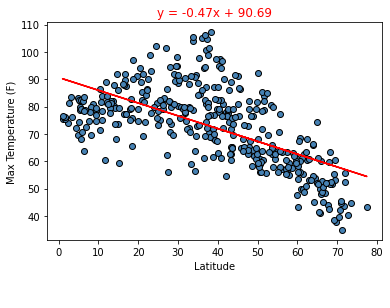

<Figure size 432x288 with 0 Axes>

In [21]:
#Linear Regression
# Add the linear regression equation and line to plot
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Max Temp"],
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "steelblue",edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(line_eq, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6227435365705937


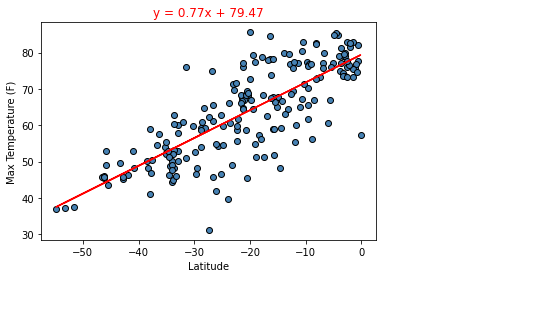

In [22]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Max Temp"],
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "steelblue",edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(line_eq, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002672501820972831


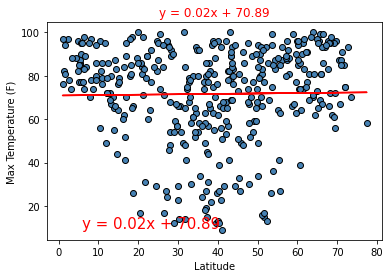

In [23]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Humidity"],
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "steelblue",edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(line_eq, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 3.171725199478509e-06


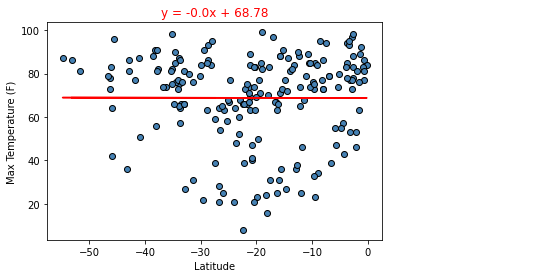

In [24]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Humidity"],
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "steelblue",edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(line_eq, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0003699677729121588


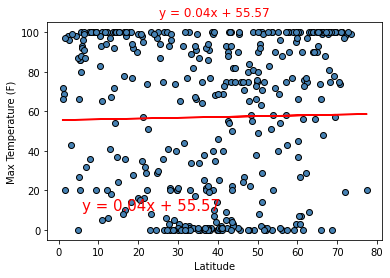

In [25]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Clouds"],
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "steelblue",edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(line_eq, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0008162282238783192


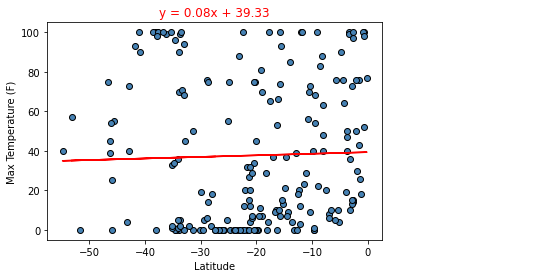

In [26]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Clouds"],
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "steelblue",edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(line_eq, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004953568139779793


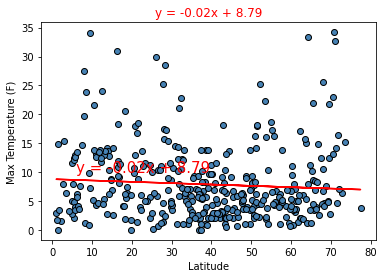

In [27]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Wind Speed"],
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "steelblue",edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(line_eq, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.035277152077529635


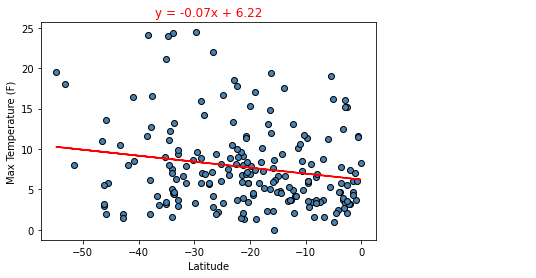

In [28]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Wind Speed"],
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "steelblue",edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(line_eq, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()